# Problem 4

## Introduction

In [86]:
#Import libraries
import skimage.io
from skimage import data,io
import matplotlib.pyplot as plt
import numpy as np

## Add Noise to image

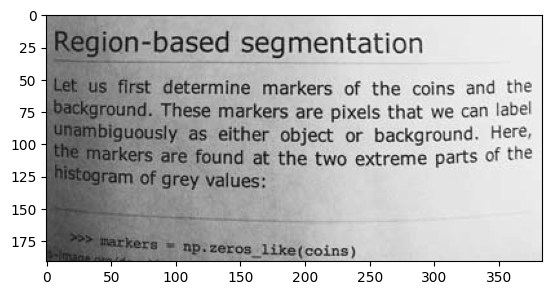

In [221]:
# read image
rng = np.random.default_rng(None)

image=data.page()

fig, ax = plt.subplots()
plt.imshow(image,cmap='gray')

In [213]:
from skimage.util import img_as_ubyte

def add_noise(image,noise_type):
    if noise_type == 'uniform':
        #convert
        img=skimage.img_as_float(image)
        #Generate Noise
        noise=rng.uniform(0,1,image.shape)
        out = np.clip(img+noise, 0, 1.0)
        return img_as_ubyte(out)

    elif noise_type == "gaussian":
        #convert
        img=skimage.img_as_float(image)
        mean = 0
        var = 0.01
        #Generate Noise
        noise=rng.normal(mean, var** 0.5, image.shape)
        out = np.clip(img+noise, 0, 1.0)
        return img_as_ubyte(out)

    elif noise_type == "salt&pepper":
        out = np.copy(image)
        amount=0.1
        salt_vs_pepper=0.8
        img=skimage.img_as_float(image)
        out = np.copy(img)
        #Salt
        # Randomly pick some pixels in the
        # image for coloring them white
        # Salt mode
        num_salt = np.ceil(amount * image.size * salt_vs_pepper)
        for i in range(int(num_salt)):
            # Pick a random y coordinate
            y_coord=np.random.randint(0, out.shape[0] - 1)
            # Pick a random x coordinate
            x_coord=np.random.randint(0, out.shape[1] - 1)
            # Color that pixel to white
            out[y_coord][x_coord] = 1
        # Pepper mode
        num_pepper = np.ceil(amount * image.size * (1-salt_vs_pepper))
        for i in range(int(num_salt)):
            # Pick a random y coordinate
            y_coord=np.random.randint(0, out.shape[0] - 1)
            # Pick a random x coordinate
            x_coord=np.random.randint(0, out.shape[1] - 1)
            # Color that pixel to white
            out[y_coord][x_coord] = 0

        return img_as_ubyte(out)
    elif noise_type == "no":
        return image
    else:
        print("Wrong noise type")

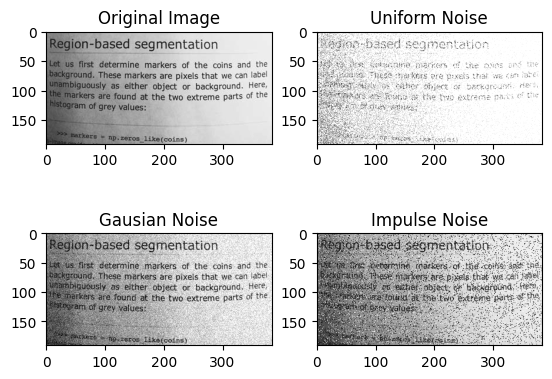

In [ ]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image,cmap='gray')

plt.subplot(2, 2, 2)
plt.title("Uniform Noise")
plt.imshow(add_noise(image,'uniform'),cmap='gray')

plt.subplot(2, 2, 3)
plt.title("Gausian Noise")
plt.imshow(add_noise(image,'gaussian'),cmap='gray')

plt.subplot(2, 2, 4)
plt.title("Impulse Noise")
plt.imshow(add_noise(image,'salt&pepper'),cmap='gray')

plt.show()

## Mean, median and Mode filter

The idea of mean filtering is simply to replace each pixel value in an image with the mean (average) value of its neighbors, including itself. Mean filtering is usually thought of as a convolution filter. Like other convolutions it is based around a kernel, which represents the shape and size of the neighborhood to be sampled when calculating the mean. Often a 3×3 square kernel is used,

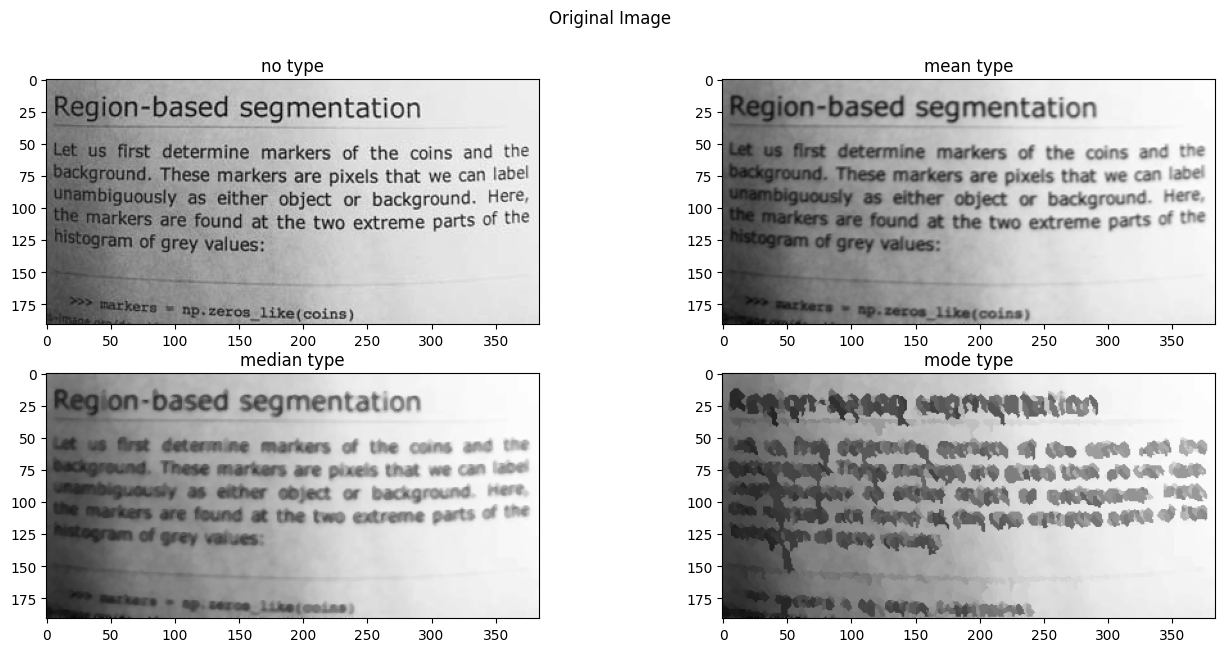

In [226]:
from scipy import stats

def filter_image(image,filter_type,filter_size):
    img = image
    index= filter_size // 2
    if filter_type=="mean":
        for i in range(index, image.shape[0]-index):
            for j in range(1, image.shape[1]-index):
                block = image[i-index:i+index+1, j-index:j+index+1]
                m = np.mean(block,dtype=np.float32)
                img[i][j] = int(m)
        return img
    elif filter_type=="median":
        for i in range(index, image.shape[0]-index):
            for j in range(1, image.shape[1]-1):
                block = image[i-index:i+index+1, j-index:j+index+1]
                m = np.median(block)
                img[i][j] = m
        return img
    elif filter_type=='mode':
        for i in range(index, image.shape[0]-index):
            for j in range(index, image.shape[1]-index):
                block = image[i-index:i+index+1, j-index:j+index+1]
                m = stats.mode(block,axis=None,keepdims=False)
                img[i][j] = m[0]
        return img
    elif filter_type == "no":
        return img
    else:
        print("Wrong filter type name")

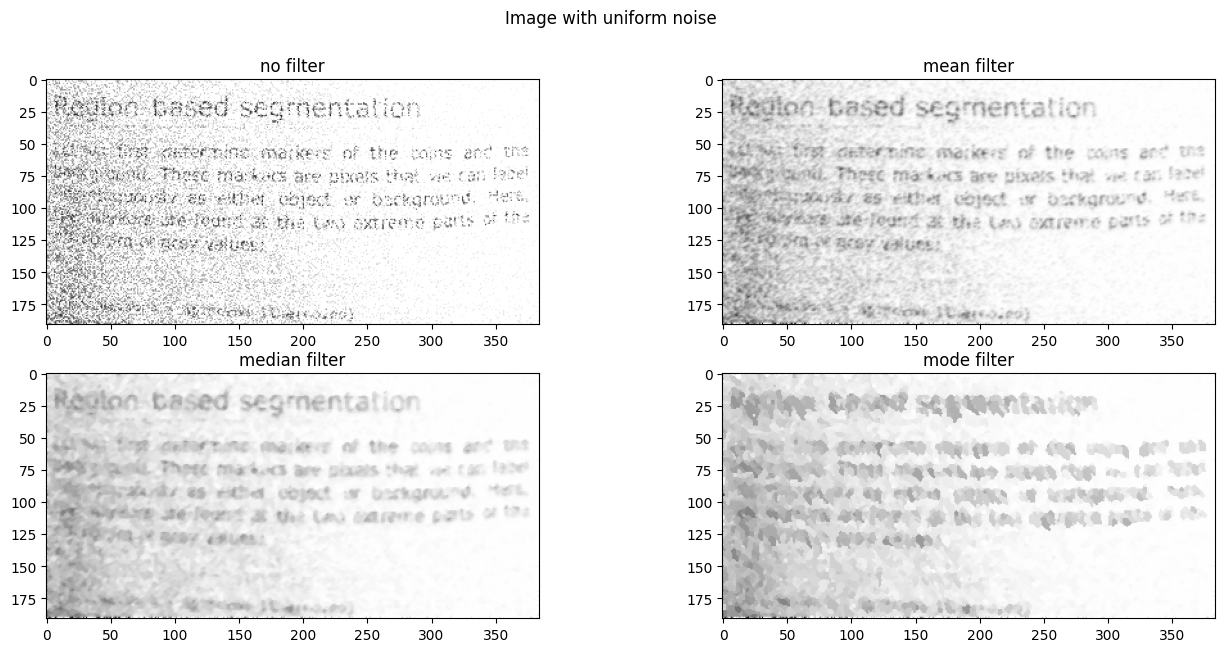

In [227]:
filter_type=['no','mean','median','mode']

## Original Image
orig_img=data.page()

fig = plt.figure(figsize = (16,7))
i=1
for filt in filter_type:
    filt_img=filter_image(orig_img,filt,filter_size=3)
    ax=fig.add_subplot(2,2,i)
    ax.set_title(f'{filt} filter')
    ax.imshow(filt_img,cmap='gray')
    i+=1

fig.suptitle('Original Image')
plt.show()


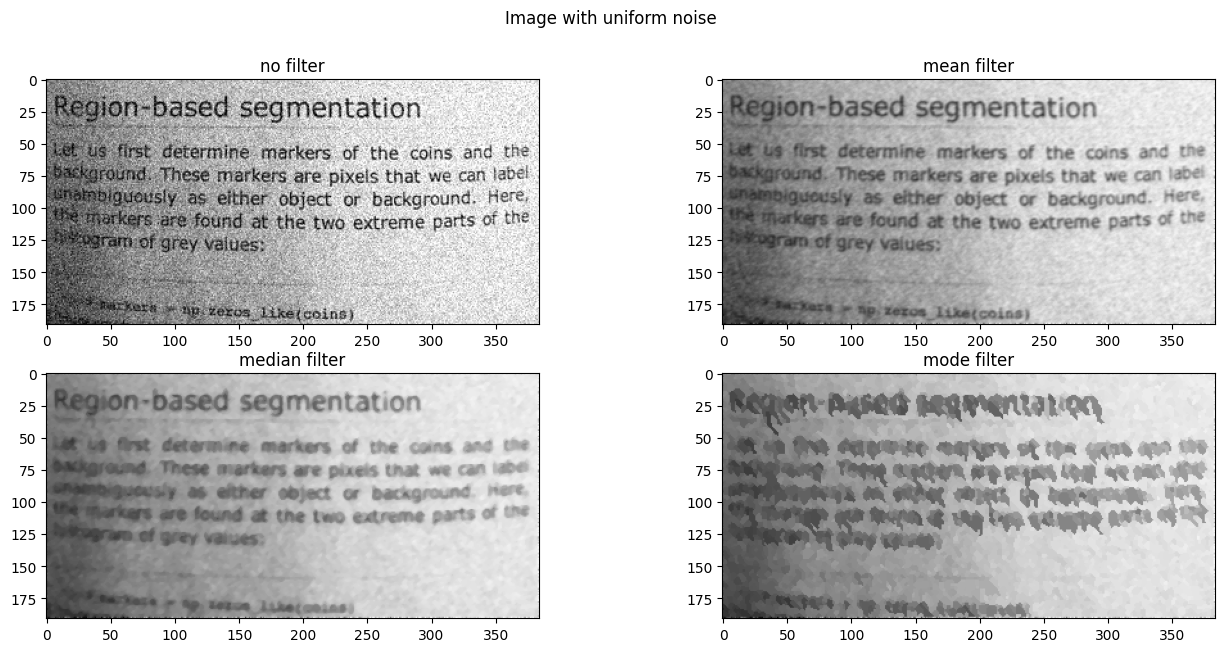

In [228]:
## Image with uniform noise
un_img=add_noise(data.page(),'uniform') 

fig = plt.figure(figsize = (16,7))
i=1
for filt in filter_type:
    filt_img=filter_image(un_img,filt,filter_size=3)
    ax=fig.add_subplot(2,2,i)
    ax.set_title(f'{filt} filter')
    ax.imshow(filt_img,cmap='gray')
    i+=1

fig.suptitle('Image with uniform noise')
plt.show()


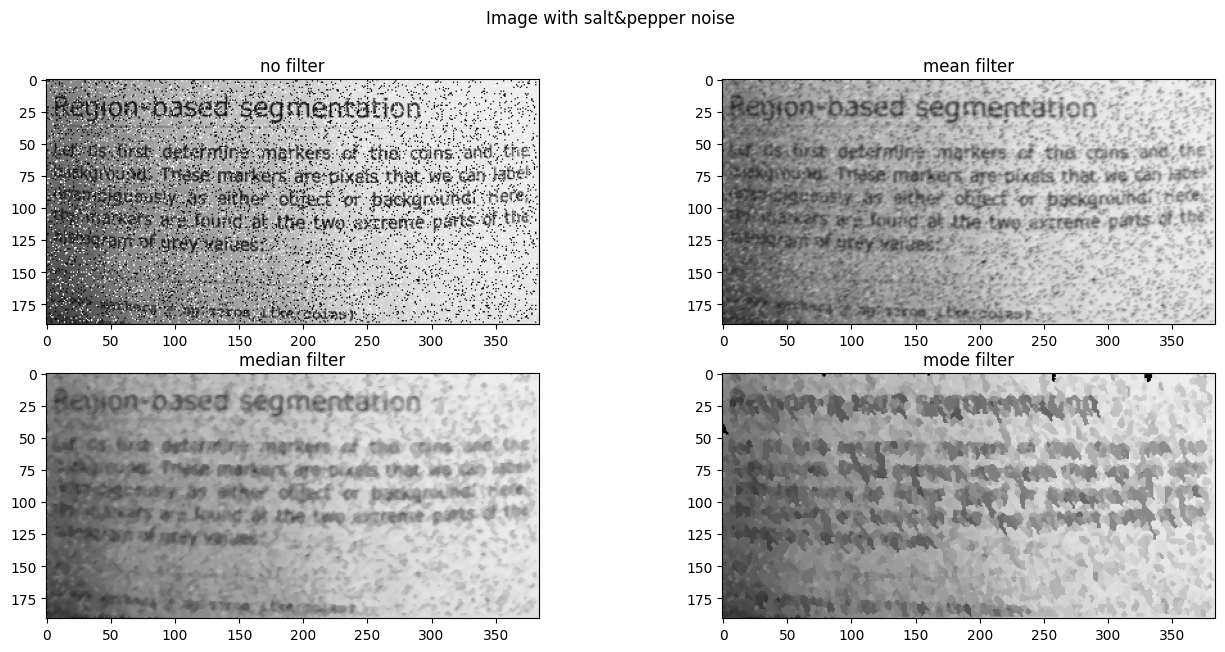

In [229]:
## Image with uniform noise
un_img=add_noise(data.page(),'gaussian') 

fig = plt.figure(figsize = (16,7))
i=1
for filt in filter_type:
    filt_img=filter_image(un_img,filt,filter_size=3)
    ax=fig.add_subplot(2,2,i)
    ax.set_title(f'{filt} filter')
    ax.imshow(filt_img,cmap='gray')
    i+=1

fig.suptitle('Image with gaussian noise')
plt.show()


In [ ]:
## Image with uniform noise
un_img=add_noise(data.page(),'salt&pepper') 

fig = plt.figure(figsize = (16,7))
i=1
for filt in filter_type:
    filt_img=filter_image(un_img,filt,filter_size=3)
    ax=fig.add_subplot(2,2,i)
    ax.set_title(f'{filt} filter')
    ax.axis('off')
    ax.imshow(filt_img,cmap='gray')
    i+=1

fig.suptitle('Image with salt&pepper noise')
plt.show()


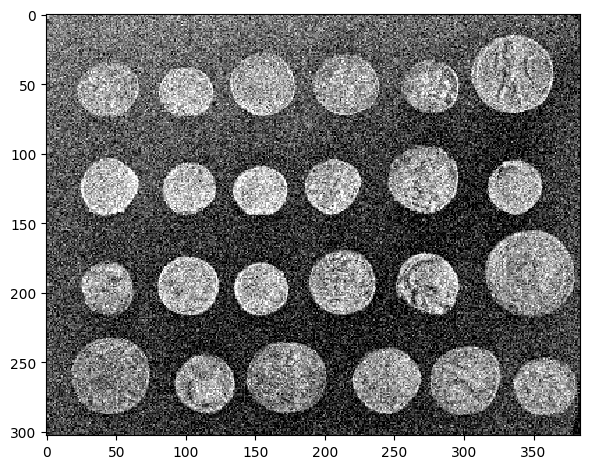

In [244]:
#Redo the example given in Section 5.3 of the lecture notes on Images with the filters you defined above.

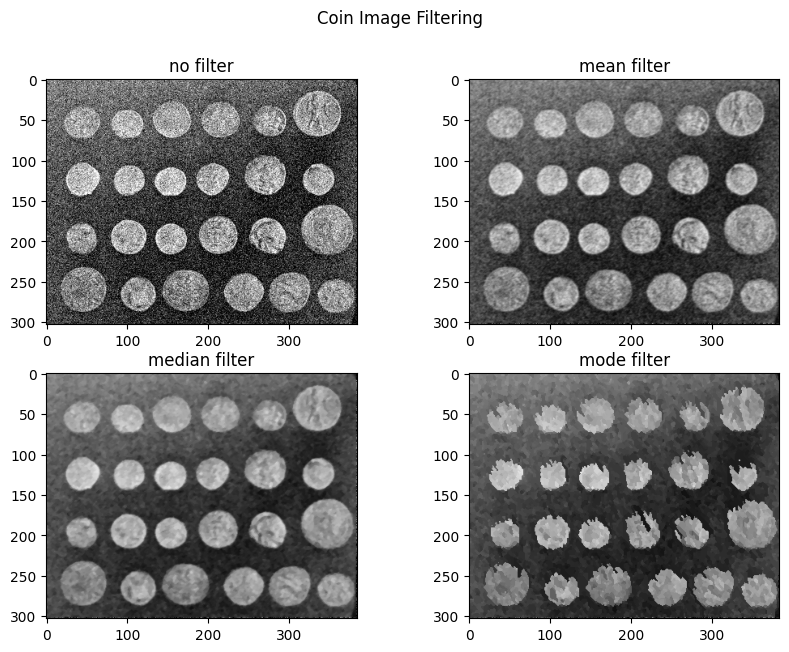

In [245]:
coin_img = data.coins ()
from skimage.util import random_noise
sigma = 0.155
noisy = random_noise(coin_img , var=sigma**2) 
io.imshow(noisy)

In [ ]:
noisy=img_as_ubyte(noisy)
fig = plt.figure(figsize = (10,7))
i=1
for filt in filter_type:
    filt_img=filter_image(noisy,filt,filter_size=3)
    ax=fig.add_subplot(2,2,i)
    ax.set_title(f'{filt} filter')
    ax.imshow(filt_img,cmap='gray')
    i+=1

fig.suptitle('Coin Image Filtering')
plt.show()